In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
import math

In [2]:
del_df=pd.read_csv('deliveries2.csv', )
mat_df=pd.read_csv('matches.csv')


In [3]:
mat_df['winner']=mat_df.winner.astype('category')
mat_df['city']=mat_df.city.astype('category')
mat_df['team1']=mat_df.team1.astype('category')
mat_df['team2']=mat_df.team2.astype('category')
mat_df['toss_winner']=mat_df.toss_winner.astype('category')
mat_df['toss_decision']=mat_df.toss_decision.astype('category')
mat_df['result']=mat_df.result.astype('category')



[Text(0, 0, 'Chennai Super Kings'),
 Text(0, 0, 'Deccan Chargers'),
 Text(0, 0, 'Delhi Capitals'),
 Text(0, 0, 'Delhi Daredevils'),
 Text(0, 0, 'Gujarat Lions'),
 Text(0, 0, 'Kings XI Punjab'),
 Text(0, 0, 'Kochi Tuskers Kerala'),
 Text(0, 0, 'Kolkata Knight Riders'),
 Text(0, 0, 'Mumbai Indians'),
 Text(0, 0, 'Pune Warriors'),
 Text(0, 0, 'Rajasthan Royals'),
 Text(0, 0, 'Rising Pune Supergiants'),
 Text(0, 0, 'Royal Challengers Bangalore'),
 Text(0, 0, 'Sunrisers Hyderabad')]

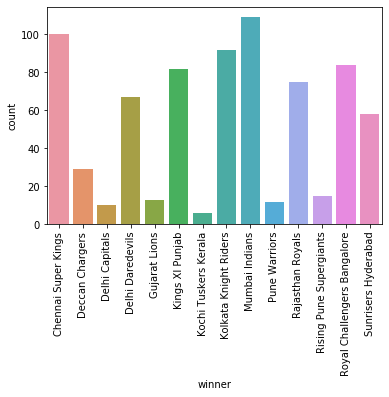

In [4]:
#Total number of matches won

chart=sns.countplot(x='winner',data=mat_df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

In [5]:
del_df['batting_team']=del_df.batting_team.astype('category')
del_df['bowling_team']=del_df.bowling_team.astype('category')

In [6]:
csk=del_df.loc[del_df['batting_team']=='Chennai Super Kings']

csk_bowl=del_df.loc[del_df['bowling_team']=='Chennai Super Kings']

In [7]:
#CSK bat and bowl totals

print('Total runs by csk:\n', csk.total_runs.sum())
print('Total wickets by csk:\n', csk_bowl['dismissal_kind'].count())



Total runs by csk:
 26418
Total wickets by csk:
 1030


In [8]:
#CSK Batsmen Stats
batsmen=csk.batsman.unique()

csk_batsmen=pd.DataFrame(columns=['batsmen', 'runs'])

for player in batsmen:
        csk_batsmen=csk_batsmen.append({'batsmen':player, 'runs':csk.loc[csk['batsman']==player, 'batsman_runs'].sum()},ignore_index=True)

csk_batsmen=csk_batsmen.sort_values('runs',ascending = False)
# print(csk_batsmen)

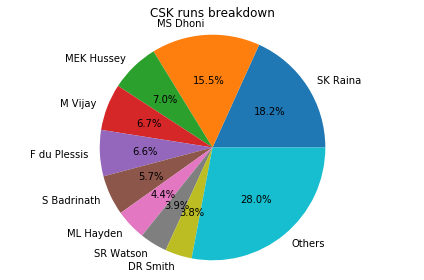

In [9]:
#CSK Batsmen Stats Plot

top_csk=csk_batsmen[:9].copy()

top_csk=top_csk.append({'batsmen':'Others', 'runs':csk_batsmen.runs[9:].sum()},ignore_index=True)

#plotting pie of CSK batsmen
plt.pie(top_csk['runs'], labels=top_csk['batsmen'], shadow=False, autopct='%1.1f%%')
plt.axis('equal')
plt.title('CSK runs breakdown')
plt.tight_layout()
plt.show()

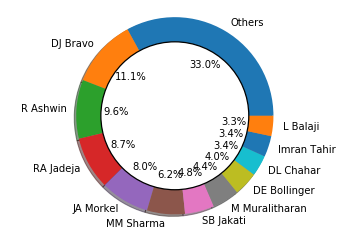

In [10]:
#CSK Bowler Stats

dismissal_kind=['caught','bowled', 'caught and bowled', 'lbw', 'stumped']

csk_bowl=csk_bowl.loc[csk_bowl['dismissal_kind'].isin(dismissal_kind)]
csk_bowlers=csk_bowl.loc[csk_bowl['dismissal_kind'].isin(dismissal_kind)].bowler.unique()


top_csk_bowlers=pd.DataFrame(columns=['bowler', 'wickets'])

for bowler in csk_bowlers:
    top_csk_bowlers=top_csk_bowlers.append({'bowler':bowler, 'wickets':len(csk_bowl[csk_bowl.bowler==bowler])}, ignore_index=True)

top_csk_bowlers=top_csk_bowlers.sort_values('wickets',ascending = False)

    
others_sum=top_csk_bowlers.wickets[11:].sum()

top_csk_bowlers=top_csk_bowlers[:11]

top_csk_bowlers=top_csk_bowlers.append({'bowler':'Others', 'wickets':others_sum}, ignore_index=True)

top_csk_bowlers=top_csk_bowlers.sort_values('wickets',ascending = False)

total_wickets= top_csk_bowlers.wickets.sum()



#donut representation
plt.pie(top_csk_bowlers['wickets'], labels=top_csk_bowlers['bowler'], autopct='%1.1f%%', shadow=True)
        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()  

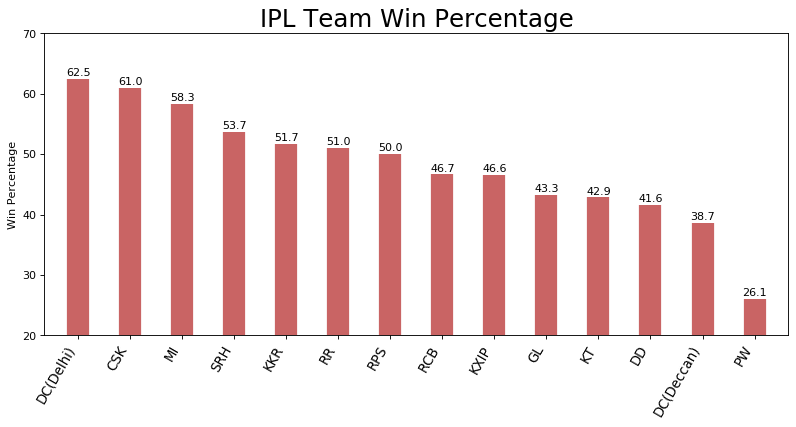

In [11]:
#IPL finding most successful team

ipl_teams= list(mat_df.team1.unique())

ipl_win_perc=pd.DataFrame(columns=['team','matches','wins'])

for team in ipl_teams:
    ipl_win_perc=ipl_win_perc.append({'team':team, 'matches':int(len(mat_df[mat_df.team1==team]))+int(len(mat_df[mat_df.team2==team])),
                         'wins':len(mat_df[mat_df.winner==team])}, ignore_index=True)

ipl_win_perc['win_percentage']=100*ipl_win_perc['wins']/ipl_win_perc['matches']

ipl_win_perc=ipl_win_perc.sort_values('win_percentage', ascending=False)


#Plotting
fig, ax = plt.subplots(figsize=(12,5), facecolor='white', dpi= 80)
ax.vlines(x=ipl_win_perc.team, ymin=0, ymax=ipl_win_perc.win_percentage, color='firebrick', alpha=0.7, linewidth=20)

# Annotate Text
for i, win in enumerate(ipl_win_perc.win_percentage):
    ax.text(i, win+0.5, round(win, 1), horizontalalignment='center')
    
labels=['DC(Delhi)', 'CSK', 'MI', 'SRH', 'KKR', 'RR', 'RPS', 'RCB', 'KXIP', 'GL', 'KT', 'DD', 'DC(Deccan)', 'PW']
    
ax.set_title('IPL Team Win Percentage', fontdict={'size':22})
ax.set(ylabel='Win Percentage', ylim=(20, 70))
plt.xticks(ipl_win_perc.team, labels, rotation=60, horizontalalignment='right', fontsize=12)
plt.show()



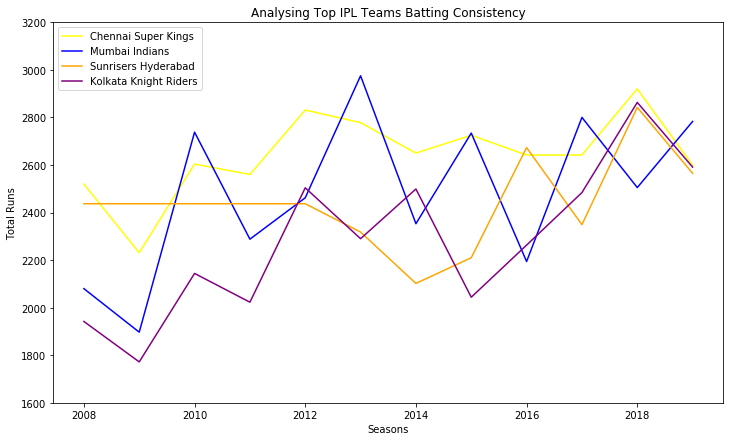

168


In [12]:
#Analysing Batting Stats of top IPL Teams

runs=del_df.groupby(['batting_team', 'season']).agg({'total_runs':'sum', 'match_id':'nunique'})
runs=pd.DataFrame(runs.to_records())
runs=runs.rename(columns={'match_id': 'total_matches'})

#Finding mean values for total_runs and total_matches
means = runs.groupby('batting_team').total_runs.mean()
mean_matches=runs.groupby('batting_team').total_matches.mean()

#Filling NaN in total_runs column with mean value
for i in runs[runs.total_runs.isnull()].index:
    runs.loc[i, 'total_runs'] = means[runs.loc[i].batting_team]

#Filling Nan in total_matches column with mean value
for j in runs[runs.total_matches.isnull()].index:
    runs.loc[j, 'total_matches'] = int(mean_matches[runs.loc[i].batting_team])
                                
#Creating list of IPL teams
teams=['Chennai Super Kings', 'Mumbai Indians', 'Sunrisers Hyderabad', 'Kolkata Knight Riders']
colors=['yellow', 'blue', 'orange', 'purple']


#Plotting Batting Consistency
fig, ax = plt.subplots(figsize=(12,7))
    
for team, color in zip(teams,colors):
    team_plot=runs.loc[runs['batting_team']==team] 
    plt.plot(team_plot['season'], team_plot['total_runs'],color=color)
    
plt.legend(teams)
plt.title('Analysing Top IPL Teams Batting Consistency')
plt.ylim(1600, 3200)
plt.xlabel('Seasons')
plt.ylabel('Total Runs')
plt.show()

print(len(runs))

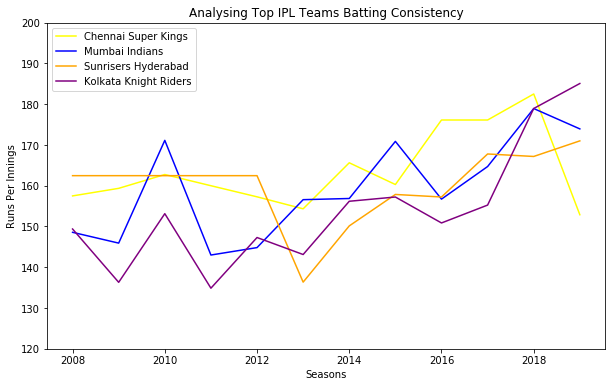

In [13]:
fig, ax = plt.subplots(figsize=(10,6))
    
for team, color in zip(teams,colors):
    team_plot=runs.loc[runs['batting_team']==team] 
    plt.plot(team_plot['season'], team_plot['total_runs']/team_plot['total_matches'],color=color)
    
plt.legend(teams)
plt.title('Analysing Top IPL Teams Batting Consistency')
plt.ylim(120, 200)
plt.xlabel('Seasons')
plt.ylabel('Runs Per Innings')
plt.show()

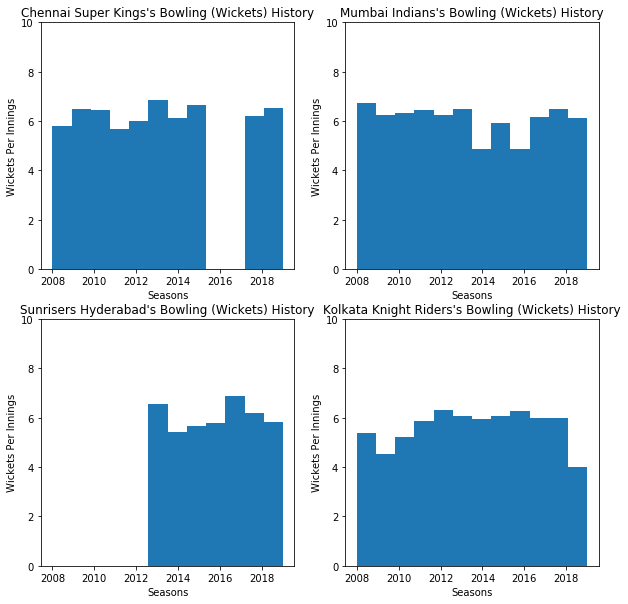

In [14]:
#Analysing Bowling Stats of IPL teams

wickets= del_df.groupby(['season', 'bowling_team']).agg({'dismissal_kind':'count', 'match_id':'nunique'})

wickets=pd.DataFrame(wickets.to_records())
wickets=wickets.rename(columns={'dismissal_kind':'total_wickets', 'match_id':'total_matches'})


#Plotting IPL Team bowling stats
fig, ax = plt.subplots(figsize=(10,10))
for team, color, i in zip(teams,colors, [1,2,3,4]):
    team_plot=wickets.loc[wickets['bowling_team']==team]
    plt.subplot(2,2,i)
    plt.hist(team_plot['season'], weights=team_plot['total_wickets']/team_plot['total_matches'], range=[2008, 2019],bins=12)
    plt.title(str(team)+"'s Bowling (Wickets) History" )
    plt.ylim(0, 10)
    plt.xlabel('Seasons')
    plt.ylabel('Wickets Per Innings')
plt.show()

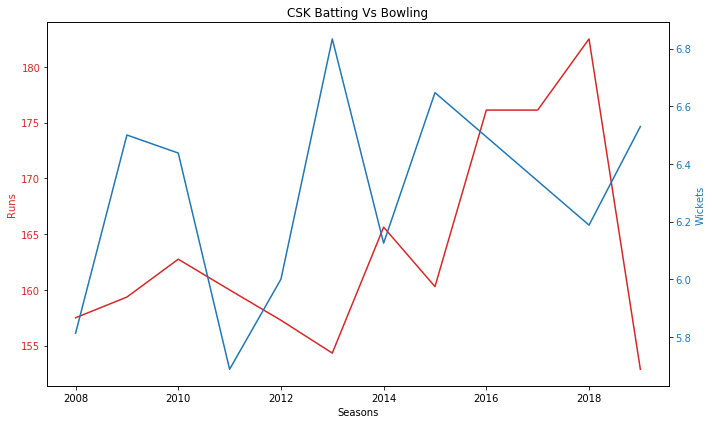

In [15]:
#CSK Batting Vs Bowling at each IPL Season

csk_bat=runs.loc[runs['batting_team']=='Chennai Super Kings'] 
csk_bowl=wickets.loc[wickets['bowling_team']=='Chennai Super Kings']


fig, ax1 = plt.subplots(figsize=(10,6))

color = 'tab:red'
ax1.set_xlabel('Seasons')
ax1.set_ylabel('Runs', color=color)
ax1.plot(csk_bat['season'], csk_bat['total_runs']/csk_bat['total_matches'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Wickets', color=color)  # we already handled the x-label with ax1
ax2.plot(csk_bowl['season'], csk_bowl['total_wickets']/csk_bowl['total_matches'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('CSK Batting Vs Bowling')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


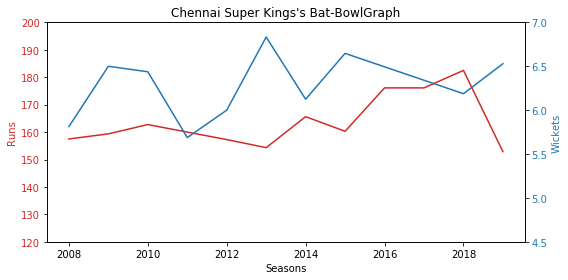

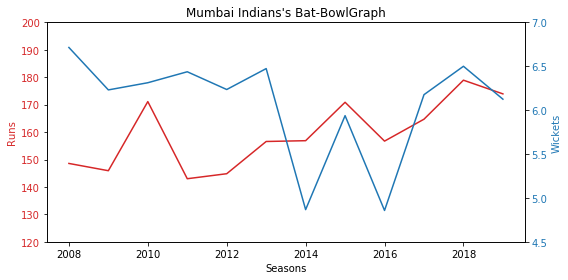

In [16]:
#CSK and MI Batting Vs Bowling at each IPL Season
teams=['Chennai Super Kings', 'Mumbai Indians']

for team,i in zip(teams, [1,2]):
    t_bat=runs.loc[runs['batting_team']==team] 
    t_bowl=wickets.loc[wickets['bowling_team']==team]
    
    
    fig, ax1 = plt.subplots(figsize=(8,4))
    plt.title(str(team)+"'s Bat-BowlGraph")
    color = 'tab:red'
    ax1.set_xlabel('Seasons')
    ax1.set_ylabel('Runs', color=color)
    plt.ylim(120, 200)
    ax1.plot(t_bat['season'], t_bat['total_runs']/t_bat['total_matches'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('Wickets', color=color)  # we already handled the x-label with ax1
    ax2.plot(t_bowl['season'], t_bowl['total_wickets']/t_bowl['total_matches'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    plt.ylim(4.5, 7)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    

In [17]:
#Finding Best Fielder of all time (Run Outs)

dismissal_kind=[ 'run out']
print(del_df.loc[del_df['dismissal_kind'].isin(dismissal_kind)].fielder.value_counts().head(3))

MS Dhoni     23
RA Jadeja    20
V Kohli      17
Name: fielder, dtype: int64


In [18]:
#Finding Best Fielder of all time (Catches)

dismissal_kind=['caught']
print(del_df.loc[del_df['dismissal_kind'].isin(dismissal_kind)].fielder.value_counts().head(3))

KD Karthik    109
SK Raina       99
MS Dhoni       98
Name: fielder, dtype: int64


In [19]:
#Finding Best wicket keeper of all time 

dismissal_kind=['stumped']
print(del_df.loc[del_df['dismissal_kind'].isin(dismissal_kind)].fielder.value_counts().head(3))

MS Dhoni      38
RV Uthappa    32
KD Karthik    29
Name: fielder, dtype: int64


In [20]:
#Finding best wicket taking Bowler of all time

dismissal_kind=['caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field']
print(del_df.loc[del_df['dismissal_kind'].isin(dismissal_kind)].bowler.value_counts().head(3))

SL Malinga    188
DJ Bravo      168
A Mishra      165
Name: bowler, dtype: int64


In [21]:
#Finding Best Economic Bowler of IPL (min 100overs bowled)

eco_bowl=del_df.groupby(['bowler']).agg({'batsman_runs':'sum', 'ball':'count'})
eco_bowl['eco_rate']=eco_bowl['batsman_runs']*6/eco_bowl['ball']
eco_bowl=eco_bowl.loc[eco_bowl['ball']>600]
eco_bowl=eco_bowl.sort_values('eco_rate',ascending = True)
print(eco_bowl.head(25))

                 batsman_runs  ball  eco_rate
bowler                                       
DW Steyn                 2283  2207  6.206615
M Muralitharan           1642  1581  6.231499
A Kumble                 1027   983  6.268566
DP Nannes                 734   689  6.391872
R Ashwin                 3224  3016  6.413793
MA Starc                  656   612  6.431373
SL Malinga               3218  2974  6.492266
WD Parnell                651   601  6.499168
SP Narine                2825  2600  6.519231
Rashid Khan              1214  1106  6.585895
J Botha                   781   709  6.609309
DL Vettori                870   785  6.649682
Harbhajan Singh          3880  3451  6.745871
B Kumar                  3067  2707  6.797931
M Kartik                 1341  1182  6.807107
B Lee                    1042   916  6.825328
JP Duminy                 802   701  6.864479
Iqbal Abdulla            1083   943  6.890774
SK Warne                 1408  1223  6.907604
RJ Harris                 998   86

In [22]:
#Finding Bowler who gave most extras (wideball & no-balls)

extras=del_df.groupby(['bowler']).agg({ 'ball':'count', 'noball_runs':'sum', 'wide_runs':'sum'})
extras['ball']=(extras.ball/6).astype('int')
extras=extras.rename(columns={'ball':'over'})
extras['extras']=extras['noball_runs']+extras['wide_runs']
extras=extras.loc[extras['over']>250]
extras=extras.sort_values('noball_runs',ascending = False)
print("Bowlers with highest noball runs:\n{0} \n\nBowlers with lowest noball runs\n{1}".format(extras.head(5),extras.tail(5)))

Bowlers with highest noball runs:
            over  noball_runs  wide_runs  extras
bowler                                          
JJ Bumrah    299           23         41      64
I Sharma     333           21         96     117
A Mishra     528           20         57      77
SL Malinga   495           20        152     172
UT Yadav     434           19        110     129 

Bowlers with lowest noball runs
            over  noball_runs  wide_runs  extras
bowler                                          
PP Chawla    526            1         63      64
P Kumar      439            1        144     145
JD Unadkat   256            1         34      35
IK Pathan    352            1         79      80
AR Patel     290            0         37      37


In [23]:
#Finding toss_winning to match winning ratio

toss_to_win=len(mat_df[(mat_df['toss_winner']==mat_df['winner']) & (mat_df['result'].isin(['normal', 'tie'])) ])

print("Toss winning to Match winning Percentage in IPL:", round(toss_to_win*100/len(mat_df)),"%")

toss_winning=pd.DataFrame(columns=['team', 'toss_win_percentage'])

for team in mat_df['team1'].unique():

    team_matches= mat_df[((mat_df['team1']==team) | (mat_df['team2']==team) )] 
    toss_to_win= len(team_matches[(team_matches['toss_winner']==team_matches['winner']) & (team_matches['result'].isin(['normal', 'tie'])) ])
    toss_winning=toss_winning.append({'team':team, 'toss_win_percentage':round(toss_to_win*100/len(team_matches))}, ignore_index=True)

toss_winning=toss_winning. sort_values('toss_win_percentage', ascending=False)
print(toss_winning) 


Toss winning to Match winning Percentage in IPL: 52 %
                           team toss_win_percentage
2                 Gujarat Lions                  73
13               Delhi Capitals                  62
3       Rising Pune Supergiants                  60
11         Kochi Tuskers Kerala                  57
5         Kolkata Knight Riders                  56
10              Deccan Chargers                  55
8           Chennai Super Kings                  54
4   Royal Challengers Bangalore                  53
6              Delhi Daredevils                  52
9              Rajasthan Royals                  52
1                Mumbai Indians                  49
7               Kings XI Punjab                  47
0           Sunrisers Hyderabad                  46
12                Pune Warriors                  41


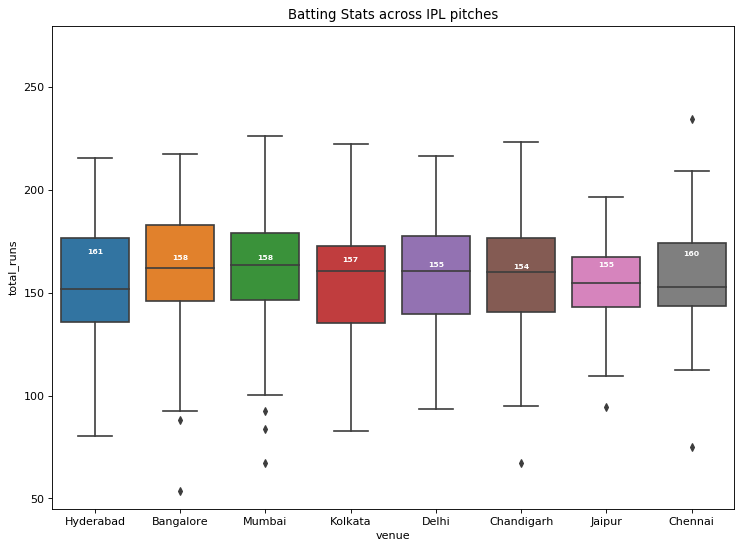

In [24]:
#Finding best batting and bowling pitch

innings_runs=del_df.groupby(['match_id']).agg({'total_runs':'sum', 'dismissal_kind':'count'})
innings_runs=pd.DataFrame(innings_runs.to_records())
innings_runs['total_runs']=innings_runs.total_runs/2
innings_runs['dismissal_kind']=innings_runs.dismissal_kind/2
innings_runs=innings_runs.rename(columns={'dismissal_kind':'total_wickets'})

def find_venue(id):
    return mat_df[mat_df['id']==id].city.values[0]
innings_runs['venue']=innings_runs.match_id.apply(find_venue)


venues=[]
for venue in innings_runs.venue.unique():
    if(len(innings_runs[innings_runs['venue']==venue])>40):
        venues.append(venue)

innings_runs=innings_runs[innings_runs['venue'].isin(venues)]

plt.figure(figsize=(11,8), dpi= 80)
box_plot =sns.boxplot(x='venue', y='total_runs', data=innings_runs, notch=False)
plt.title('Batting Stats across IPL pitches')
plt.ylim(45, 280)


means = innings_runs.groupby(['venue'])['total_runs'].mean()
vertical_offset = innings_runs['total_runs'].mean() * 0.05 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,math.ceil(means[xtick]) + vertical_offset,math.ceil(means[xtick]), 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.show()

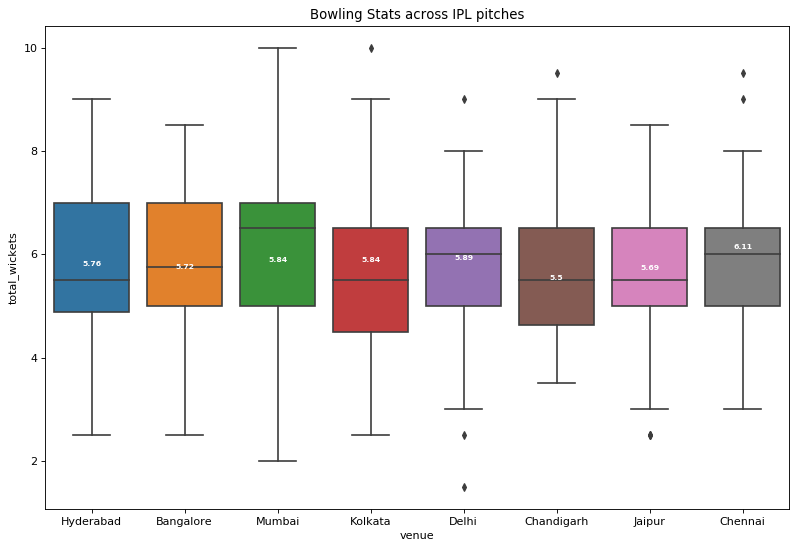

In [25]:
plt.figure(figsize=(12,8), dpi= 80)
box_plot =sns.boxplot(x='venue', y='total_wickets', data=innings_runs, notch=False)
plt.title('Bowling Stats across IPL pitches')
# plt.ylim(45, 280)


means = innings_runs.groupby(['venue'])['total_wickets'].mean()
vertical_offset = innings_runs['total_wickets'].mean() * 0.0005 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,(means[xtick]) + vertical_offset,round(means[xtick],2), 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.show()

In [26]:
#Batting First : Batting Second Ratio

matches= mat_df[mat_df['result']=='normal']

total=len(matches)
first= len(mat_df[mat_df['win_by_wickets']==0])

print("Ratio of winning by batting first and second")
print(round(first*100/total)," : " ,round(100-(first*100/total)))

Ratio of winning by batting first and second
47  :  53


In [27]:
#batsmen with most ducks

ducks=del_df.groupby(['batsman', 'match_id','inning']).agg({'batsman_runs':'sum'})
ducks=pd.DataFrame(ducks.to_records())
ducks=ducks.loc[ducks['batsman_runs']==0]

ducks=ducks.groupby('batsman').agg({'batsman_runs':'count'})
ducks=ducks.rename(columns={'batsman_runs':'duck_count'})
ducks=ducks.sort_values('duck_count', ascending=False)
print("Batsmen with most number of ducks:\n",ducks.head(7))

Batsmen with most number of ducks:
                  duck_count
batsman                    
MK Pandey                12
Harbhajan Singh          12
PA Patel                 12
PP Chawla                11
G Gambhir                11
AM Rahane                11
RG Sharma                11


In [28]:
#bowler with most dot balls

dots=del_df.loc[del_df['total_runs']==0]

dot_seasons=dots.groupby(['bowler','season']).agg({'ball':'count'})
dot_seasons= dot_seasons.sort_values('ball', ascending=False)
print("Most dot balls bowled in a season:\n",dot_seasons.head(5))


dots=dots.groupby(['bowler']).agg({'ball':'count'})
dots= dots.sort_values('ball', ascending=False)
print("\n\nMost dot balls bowled in IPL:\n",dots.head(5))

Most dot balls bowled in a season:
                    ball
bowler     season      
DW Steyn   2013     211
DL Chahar  2019     189
MG Johnson 2013     188
SL Malinga 2011     183
SP Narine  2013     180


Most dot balls bowled in IPL:
                  ball
bowler               
Harbhajan Singh  1244
SL Malinga       1144
B Kumar          1116
A Mishra         1108
PP Chawla        1100


In [29]:
#Team with most number of player of the match award

print(mat_df.player_of_match.value_counts().head(10))

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
V Kohli           12
Name: player_of_match, dtype: int64
